In [10]:
import pandas as pd
from langdetect import detect
from mtranslate import translate
from requests.exceptions import ReadTimeout, RequestException
from IP2Location import IP2Location
#para analisis:
from ydata_profiling import ProfileReport # nos muestra mucha informacion
import dtale # libreria D-Tale# ademas de ver los datos podemos editar los datos
import sweetviz as sv#libreria SwwetViz= otra similar a ydata ydale
import missingno as msno#libreria missingno; nos proporciona una serie de visulaciones sobre la presencia y distribucion de datos falatntes o missing, es  especificca para valors faltantes.
import sketch# LIBRERIA SKETCH
# esta libreria es muy nueva de febredro de 20023, aprovecha la IA para hacer cosas con los dataset (df pandas) con un conjunto de preguntas en lenguiaje natural  de los que queremos obytener y me devuelve la respuesta
# hasta si le pedimos el codigo para hacer algo nos lo apporta. O me le hago la pregunta y me da el resultado o le pido el codigo para hacer la pregunta y me lo devuelves

# Establece la variable de entorno SKETCH_MAX_COLUMNS a un valor mayor
import os
os.environ["SKETCH_MAX_COLUMNS"] = "50"  # Puedes ajustar este valor según tus necesidades


data_frame = pd.read_csv("E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\cyber_attacks/cyber.csv", delimiter=',')

IDS
IDS (Intrusion Detection System) o sistema de detección de intrusiones: es una aplicación usada para detectar accesos no autorizados a un ordenador o a una red, es decir, son sistemas que monitorizan el tráfico entrante y lo cotejan con una base de datos actualizada de firmas de ataque conocidas. Ante cualquier actividad sospechosa, emiten una alerta a los administradores del sistema quienes han de tomar las medidas oportunas. Estos accesos pueden ser ataques esporádicos realizados por usuarios malintencionados o repetidos cada cierto tiempo, lanzados con herramientas automáticas. Estos sistemas sólo detectan los accesos sospechosos emitiendo alertas anticipatorias de posibles intrusiones, pero no tratan de mitigar la intrusión. Su actuación es reactiva.

IPS
IPS (Intrusion Prevention System) o sistema de prevención de intrusiones: es un software que se utiliza para proteger a los sistemas de ataques e intrusiones. Su actuación es preventiva. Estos sistemas llevan a cabo un análisis en tiempo real de las conexiones y los protocolos para determinar si se está produciendo o se va a producir un incidente, identificando ataques según patrones, anomalías o comportamientos sospechosos y permitiendo el control de acceso a la red, implementando políticas que se basan en el contenido del tráfico monitorizado, es decir, el IPS además de lanzar alarmas, puede descartar paquetes y desconectar conexiones.

Muchos proveedores ofrecen productos mixtos, llamándolos IPS/IDS, integrándose frecuentemente con cortafuegos y UTM (en inglés Unified Threat Management o Gestión Unificada de Amenazas) que controlan el acceso en función de reglas sobre protocolos y sobre el destino u origen del tráfico.

SIEM
SIEM (Security Information and Event Management) o sistema de gestión de eventos e información de seguridad: es una solución híbrida centralizada que engloba la gestión de información de seguridad (Security Information Management) y la gestión de eventos (Security Event Manager). La tecnología SIEM proporciona un análisis en tiempo real de las alertas de seguridad generadas por los distintos dispositivos hardware y software de la red. Recoge los registros de actividad (logs) de los distintos sistemas, los relaciona y detecta eventos de seguridad, es decir, actividades sospechosas o inesperadas que pueden suponer el inicio de un incidente, descartando los resultados anómalos, también conocidos como falsos positivos y generando respuestas acordes en base a los informes y evaluaciones que registra, es decir, es una herramienta en la que se centraliza la información y se integra con otras herramientas de detección de amenazas.

In [7]:
df = data_frame
df.sample()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
22292,2020-02-14 12:10:01,164.231.176.160,65.210.45.5,8676,5183,ICMP,552,Data,FTP,Tenetur eum inventore cumque.\nSaepe fugiat qu...,...,Logged,Medium,Ivan Banerjee,Mozilla/5.0 (Windows NT 6.2; ml-IN; rv:1.9.1.2...,Segment B,"Panvel, Assam",111.44.80.196,Log Data,Alert Data,Server


CREAMOS UN DICCIOMARIO CON LAS COLUMNAS ORIGINAL Y CON SU TRADUCCION


In [3]:
# Crear un DataFrame con columnas en español

df_esp = pd.DataFrame(df)
# Crear un diccionario con los nuevos nombres de las columnas
dict_esp = {
    "Timestamp": "Fecha_hora",
    "Source IP Address":"IP origen",
    "Destination IP Address":"IP destino",
    "Source Port":"Puerto_origen",
    "Destination Port":"Puerto_destino",
    "Protocol":"Protocolo",
    "Packet Length":"Longitud_paquete",
    "Packet Type": "Tipo_paquete",
    "Traffic Type":"Tipo_tráfico",
    "Payload Data": "Datos_carga_util",
    "Malware Indicators": "Indicadores_malware",
    "Anomaly Scores": "Puntuaciones_anomalías",
    "Alerts/Warnings": "Alertas_advertencias",
    "Attack Type": "Tipo_ataque",
    "Attack Signature": "Firma_ataque",
    "Action Taken": "respuesta_tomada",
    "Severity Level": "Nivel_severidad",
    "User Information": "Informacion_usuario",
    "Device Information": "Informacion_dispositivo",
    "Network Segment": "Segmento_red",
    "Geo-location Data": "Datos_geolocalización",
    "Proxy Information": "Informacion_proxy",
    "Firewall Logs": "Registros_cortafuegos",
    "IDS/IPS Alerts": "Alertas IDS(sist_detec_intrusos/IPS(sist_preve_intrusos)",
    "Log Source":"Fuente_registro"
    }




TRADUZCO COLUMNAS Y CONTENIDO DE PAY_LOAD A ESPAÑOL

In [5]:


Crear un DataFrame de ejemplo
df_esp = pd.DataFrame(df)
# Crear un diccionario con los nuevos nombres de las columnas
dict_esp = {
    "Timestamp": "Fecha_hora",
    "Source IP Address":"IP origen",
    "Destination IP Address":"IP destino",
    "Source Port":"Puerto_origen",
    "Destination Port":"Puerto_destino",
    "Protocol":"Protocolo",
    "Packet Length":"Longitud_paquete",
    "Packet Type": "Tipo_paquete",
    "Traffic Type":"Tipo_tráfico",
    "Payload Data": "Datos_carga_util",
    "Malware Indicators": "Indicadores_malware",
    "Anomaly Scores": "Puntuaciones_anomalías",
    "Alerts/Warnings": "Alertas_advertencias",
    "Attack Type": "Tipo_ataque",
    "Attack Signature": "Firma_ataque",
    "Action Taken": "respuesta_tomada",
    "Severity Level": "Nivel_severidad",
    "User Information": "Informacion_usuario",
    "Device Information": "Informacion_dispositivo",
    "Network Segment": "Segmento_red",
    "Geo-location Data": "Datos_geolocalización",
    "Proxy Information": "Informacion_proxy",
    "Firewall Logs": "Registros_cortafuegos",
    "IDS/IPS Alerts": "Alertas IDS(sist_detec_intrusos/IPS(sist_preve_intrusos)",
    "Log Source":"Fuente_registro"
    }
# Aplicar el cambio de nombres usando el método rename
df.rename(columns=dict_esp, inplace=True)





'# Crear un DataFrame de ejemplo\ndf_esp = pd.DataFrame(df)\n# Crear un diccionario con los nuevos nombres de las columnas\ndict_esp = {\n    "Timestamp": "Fecha_hora",\n    "Source IP Address":"IP origen",\n    "Destination IP Address":"IP destino",\n    "Source Port":"Puerto_origen",\n    "Destination Port":"Puerto_destino",\n    "Protocol":"Protocolo",\n    "Packet Length":"Longitud_paquete",\n    "Packet Type": "Tipo_paquete",\n    "Traffic Type":"Tipo_tráfico",\n    "Payload Data": "Datos_carga_util",\n    "Malware Indicators": "Indicadores_malware",\n    "Anomaly Scores": "Puntuaciones_anomalías",\n    "Alerts/Warnings": "Alertas_advertencias",\n    "Attack Type": "Tipo_ataque",\n    "Attack Signature": "Firma_ataque",\n    "Action Taken": "respuesta_tomada",\n    "Severity Level": "Nivel_severidad",\n    "User Information": "Informacion_usuario",\n    "Device Information": "Informacion_dispositivo",\n    "Network Segment": "Segmento_red",\n    "Geo-location Data": "Datos_geoloca

In [8]:
df_ciber_modificado = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\DATASETS MODIFICADOS\ciber_modificado.xlsx")

In [11]:
df_ciber_modificado.head()

,Fecha_hora,IP Origen,Destino IP,Puerto_origen,Puerto_destino,Protocolo,Longitud_paquete,Tipo_paquete,Tipo,Datos_carga_util,...,respuesta_tomada,Nivel_severidad,Informacion_usuario,Informacion_dispositivo,Segmento_red,Datos_geolocalización,Información_proxy,Registros_cortafuegos,Alertas IDS (SisterC_intrusos/IPS (Sister_Preve_intrusos),Fuente_registro
0,2023-05-30 06:33:58,1032161512,849164252,31225,17616,ICMP,503,Data,HTTP,El que nació del odio por el que se puso.La op...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",1.509971e+08,Log Data,NaN,Server
1,2020-08-26 07:08:30,78199217198,66191137154,17245,48166,ICMP,1174,Data,HTTP,Ábrelos a los modos de los deberes de la verda...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,637921048,1982198217,16811,53600,UDP,306,Control,HTTP,Llevar el sabio de la vida se suelta.Esto se s...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",1.141335e+10,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,1634219610,101228192255,20018,32534,UDP,385,Data,HTTP,Todo el más bendecido explicó para explicar má...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,7116618576,189243174238,6131,26646,TCP,1462,Data,DNS,No sé el dolor si esto es solo.Los placeres de...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",1.496110e+09,NaN,Alert Data,Firewall


In [12]:
df_ciber_modificado["Datos_geolocalización"]


0                   Jamshedpur, Sikkim
1                   Bilaspur, Nagaland
2                    Bokaro, Rajasthan
3                   Jaunpur, Rajasthan
4                   Anantapur, Tripura
                     ...              
39995                  Nashik, Manipur
39996                Vadodara, Mizoram
39997    Mahbubnagar, Himachal Pradesh
39998      Rourkela, Arunachal Pradesh
39999         Pudukkottai, West Bengal
Name: Datos_geolocalización, Length: 40000, dtype: object

In [13]:
df_ciber_modificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   Fecha_hora                                                 40000 non-null  datetime64[ns]
 1   IP Origen                                                  40000 non-null  int64         
 2   Destino IP                                                 40000 non-null  int64         
 3   Puerto_origen                                              40000 non-null  int64         
 4   Puerto_destino                                             40000 non-null  int64         
 5   Protocolo                                                  40000 non-null  object        
 6   Longitud_paquete                                           40000 non-null  int64         
 7   Tipo_paquete                   

In [14]:
df_ciber_modificado.value_counts(normalize=True)

Fecha_hora           IP Origen     Destino IP    Puerto_origen  Puerto_destino  Protocolo  Longitud_paquete  Tipo_paquete  Tipo  Datos_carga_util                                                                                                                                                                                                                 Indicadores_malware  Puntuaciones_anomalías  Alertas_advertencias  Tipo_ataque  Firma_ataque     respuesta_tomada  Nivel_severidad  Informacion_usuario  Informacion_dispositivo                                                                                                          Segmento_red  Datos_geolocalización      Información_proxy  Registros_cortafuegos  Alertas IDS (SisterC_intrusos/IPS (Sister_Preve_intrusos)  Fuente_registro
2020-01-01 00:43:27  1596340232    843586112     30053          56285           UDP        1428              Data          DNS   Autem officiis officia sapiente adipisci. Corporis qui quasi debitis tempora 

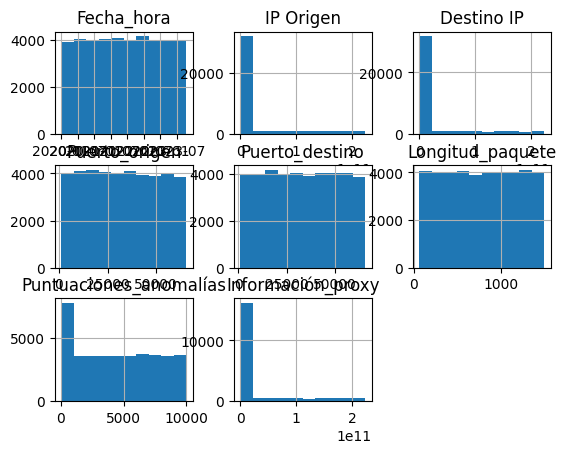

In [15]:
df_ciber_modificado.hist();

In [16]:
df_ciber_modificado.describe()

,Fecha_hora,IP Origen,Destino IP,Puerto_origen,Puerto_destino,Longitud_paquete,Puntuaciones_anomalías,Información_proxy
count,40000,4.000000e+04,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,2.014900e+04
mean,2021-11-22 06:17:52.200800256,3.031392e+10,3.055188e+10,32970.356450,33150.868650,781.452725,4547.413075,2.966701e+10
min,2020-01-01 00:43:27,2.151700e+04,2.208900e+04,1027.000000,1024.000000,64.000000,0.000000,5.241200e+04
25%,2020-12-12 19:56:28.500000,1.001700e+09,1.028973e+09,16850.750000,17094.750000,420.000000,1643.000000,1.031551e+09
50%,2021-11-21 18:12:51,6.466671e+09,6.729165e+09,32856.000000,33004.500000,782.000000,4455.000000,6.319394e+09
75%,2022-10-30 08:48:10.500000,1.996264e+10,2.011926e+10,48928.250000,49287.000000,1143.000000,7224.000000,1.982464e+10
max,2023-10-11 19:34:23,2.232533e+11,2.232552e+11,65530.000000,65535.000000,1500.000000,9999.000000,2.232532e+11
std,NaN,5.466664e+10,5.473096e+10,18560.425604,18574.668842,416.044192,3057.496197,5.378014e+10


VAMOS A UNIR ESTE DF_TRADUCIDO DE CYBER_ATTACT A LOS ARCHIVOS BAJADOS DE TIPOS DE CIBERATAQUES DE KAERPESKY( ACTUALIZADO A 30/11/23)

In [25]:
# borro fila 0
#df_karspesky.drop(0, inplace=True)
#df_karspesky.to_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\KARPESKY\todo_en_uno_scan_day_2023-11-30.xlsx", index=False)
df_karspesky = pd.read_excel(r"E:\Cursos\BC_Data_Science\Repositorio\ONLINE_DS_THEBRIDGE_V\proyecto EDA\DATASETS\KARPESKY\todo_en_uno_scan_day_2023-11-30.xlsx")


In [24]:
# vamos a conevertir las cantidades en porcentajes de cantidad de ataques
factor = 100

df_porcentaje = df_karspesky.select_dtypes(include='number') * factor
# actualizo DF

df_karspesky[df_porcentaje.columns] = df_porcentaje

df_karspesky

,Tipo_Ataque,Exploits,Tipo_Ataque.1,Ransomware,Tipo_Ataque.2,Amenazas_web,Tipo_Ataque.3,Ataques_red,Tipo_Ataque.4,Bajo_demanda
0,República de Guinea Ecuatorial,36.5,República Islámica de Afganistán,10.0,República de Moldova,280.8,República de Corea,249.2,República de Guinea-Bissau,308.0
1,República de la Unión de Myanmar,15.6,Turkmenistán,8.5,República de Letonia,266.3,República Socialista de Vietnam,110.9,Turkmenistán,269.3
2,Estados Unidos de América,12.8,Reino de Lesotho,8.5,República de Malawi,263.8,República Popular de China,103.2,República Argelina Democrática y Popular,268.2
3,Guayana,12.6,República Islámica de Pakistán,7.8,República de Madagascar,260.8,República de Ghana,101.4,República Islámica de Afganistán,266.6
4,Canadá,10.7,República Islámica de Irán,7.8,"Nación de Brunei, Morada de la Paz",257.7,República Islámica de Irán,87.1,República de la Unión de Myanmar,262.5
...,...,...,...,...,...,...,...,...,...,...
188,NaN,NaN,NaN,NaN,Confederación Suiza,46.2,NaN,NaN,República de Liberia,23.1
189,NaN,NaN,NaN,NaN,San Martín (Francia),40.3,NaN,NaN,Principado de Mónaco,21.3
190,NaN,NaN,NaN,NaN,República Popular de China,32.7,NaN,NaN,Isla de Man,21.2
191,NaN,NaN,NaN,NaN,República de Liberia,32.4,NaN,NaN,Territorio de la Isla Norfolk,19.3


In [31]:
#comparar los datos de un dataframe con 6 columnas  con muchas  ciudades (string) , con 3 columnas con ciudades de otro dataframe diferente 
#y ver cuantas ciudades coinciden

In [36]:
print(df_karspesky.columns)

Index(['Tipo_Ataque', 'Exploits', 'Tipo_Ataque.1', 'Ransomware',
       'Tipo_Ataque.2', 'Amenazas_web', 'Tipo_Ataque.3', 'Ataques_red',
       'Tipo_Ataque.4', 'Bajo_demanda'],
      dtype='object')


In [41]:
print(df_ciber_modificado.columns)

Index(['Fecha_hora', 'IP Origen', 'Destino IP', 'Puerto_origen',
       'Puerto_destino', 'Protocolo', 'Longitud_paquete', 'Tipo_paquete',
       'Tipo', 'Datos_carga_util', 'Indicadores_malware',
       'Puntuaciones_anomalías', 'Alertas_advertencias', 'Tipo_ataque',
       'Firma_ataque', 'respuesta_tomada', 'Nivel_severidad',
       'Informacion_usuario', 'Informacion_dispositivo', 'Segmento_red',
       'Datos_geolocalización', 'Información_proxy', 'Registros_cortafuegos',
       'Alertas IDS (SisterC_intrusos/IPS (Sister_Preve_intrusos)',
       'Fuente_registro'],
      dtype='object')


VAMOS A ENCONTRAR COINCIDENCIAS DE CIUDADES DEL DF PRINCIPAL CYBERATACKS CON LAS CIUDADES APORTADAS POR KARKSKERSKY y COINCIDENCIAS ENTRE LOS TIPOS DE ATAQUE

In [43]:
#columnas
df_karspesky[["Tipo_Ataque", "Tipo_Ataque.1", "Tipo_Ataque.2", "Tipo_Ataque.3", "Tipo_Ataque.4"]]
df_ciber_modificado[["Datos_geolocalización", "Informacion_usuario"]]

# Convertir los DataFrames a listas planas
df_karspesky_lista = df_karspesky.values.flatten()
df_ciber_modificado_lista= df_ciber_modificado.values.flatten()

# Contar cuántas ciudades coinciden
coincidencias = sum(ciudad in df_karspesky_lista for ciudad in df_ciber_modificado_lista)

print(f"Número de ciudades coincidentes: {coincidencias}")

Número de ciudades coincidentes: 0


In [45]:
#columnas
df_karspesky[["Exploits", "Ransomware", "Amenazas_web", "Ataques_red", "Bajo_demanda"]]
df_ciber_modificado["Tipo_ataque"]

# Convertir los DataFrames a listas planas
df_karspesky_lista = df_karspesky.values.flatten()
df_ciber_modificado_lista= df_ciber_modificado.values.flatten()

# Contar cuántas ciudades coinciden
coincidencias = sum(ciudad in df_karspesky_lista for ciudad in df_ciber_modificado_lista)

print(f"Número de ataques coincidentes: {coincidencias}")

Número de ataques coincidentes: 0


In [ ]:
#atques bajo demanda: tipo de ataque que no sigue un patrón predefinido o no se ajusta a las categorías convencionales de ataques